# Predicting Heart Disease using Machine Learning

In this notebook I will put together all the concepts I have learnt about the foundation concepts in machine learning and data science by explorin the problem of heart disease  **classification**.
It is basically an end-to-end **proof of concept** in data science and machine learning

# Structured Data 
1. These are data you can fit into rows and column
2. The have feature variables and labels or target vaiables

## The Steps in a full machine learning project includes :
1. ### Data collection
2. ### Data modelling
  * #### Problem definition : What problems are we trying to solve?
  * #### Data : What data do we have?
  * #### Evaluaton : What defines succcess?
  * #### Features : What features are we trying to modell?
  * #### Modelling : What kind of model should we use?
  * #### Experiments : What have we tried? What else can we try?
3. ## Deployment

# Steps to take in anew project
* #### Have your computer
* #### Download and install Miniconda (which come with Conda)
* #### Start new project
* #### Create project folder
* #### Import the CSV data
* #### Creat an environment (collection of tools) using CONDA, Jupyter Notebook (Workspace)
* #### Perform Data Analysis and Manipulation with Pandas , Numpy and Matplotlib
* #### Perform Machine learning with Scikit-Learn

# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraires in an attempt to build a machine learning modelcapable of predicting whether or not someone has heart disease based on their medical attriblutes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1.Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle.https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If I can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, I'll purse the project.

## 4. Features

**Create data dictionary **

* age in years
* sex (1 = male; 0 = female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

## Preparing the tools

I am going to use pandas , Matplotlib and Numpy for data analysis and manipulation

In [98]:
# Import all the tools we need

# Regular EDA ( exploratory data analysis) and plotting  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I want our plot to appear inside the notebook
%matplotlib inline  

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [99]:
df = pd.read_csv('6.1 heart-disease.csv.csv')

In [3]:
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more more out your data?



In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
 df.target # Method 1 of accessing column in a dataframe

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
# Let's findout how many of each class there
df['target'].value_counts() # Method 2 of accessing colunm in a dataframe

1    165
0    138
Name: target, dtype: int64

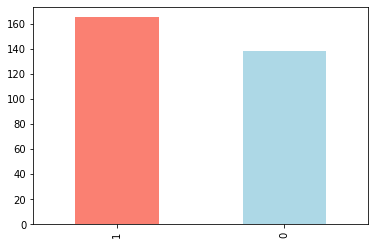

In [7]:
# Visiualizing the data in bar plot
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts() # (Male = 1, female = 0)

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column wiht sex colun
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [13]:
# Compare target column with chest pain
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


In [14]:
df.sex.value_counts(normalize = True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

In [15]:
# Compare Sex with Chest pain
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


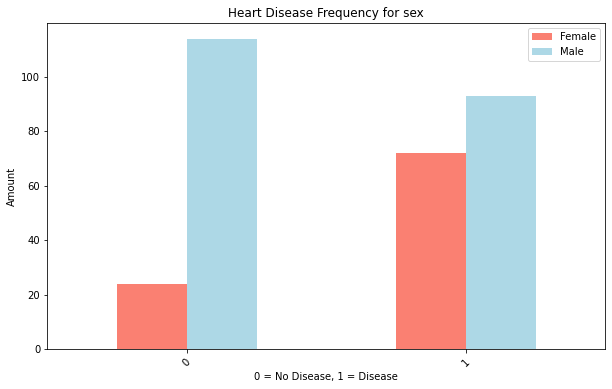

In [16]:
# Create a plot of crosstab of target and sex
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 45);


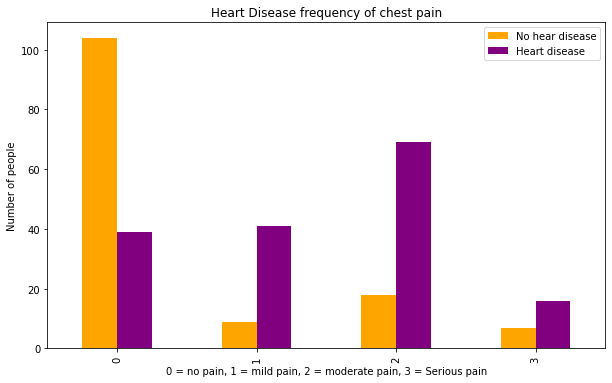

In [17]:
# Creat a data of crosstab target and chest pain
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10, 6), color = ['orange', 'purple'])

plt.title('Heart Disease frequency of chest pain')

plt.xlabel('0 = no pain, 1 = mild pain, 2 = moderate pain, 3 = Serious pain')
plt.ylabel('Number of people')
plt.legend(['No hear disease', "Heart disease"]);

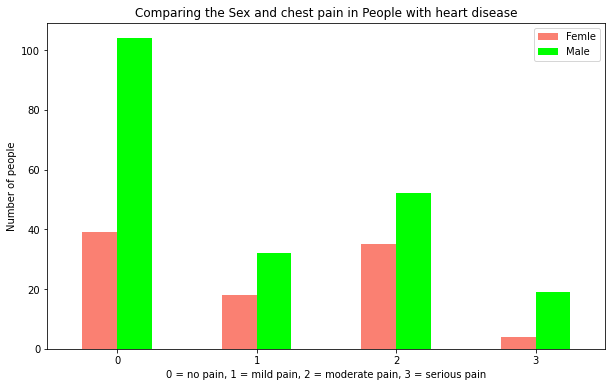

In [18]:
# Create a data of crosstab of sex and chest pain
pd.crosstab(df.cp, df.sex).plot(kind = 'bar',
                               figsize = (10, 6),
                               color = ['salmon', 'lime'])

plt.title('Comparing the Sex and chest pain in People with heart disease')
plt.xlabel('0 = no pain, 1 = mild pain, 2 = moderate pain, 3 = serious pain')
plt.ylabel('Number of people')
plt.legend(['Femle', 'Male'])
plt.xticks(rotation = 0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

# Comparing Age vs Max Heart Rate for Heart Disease

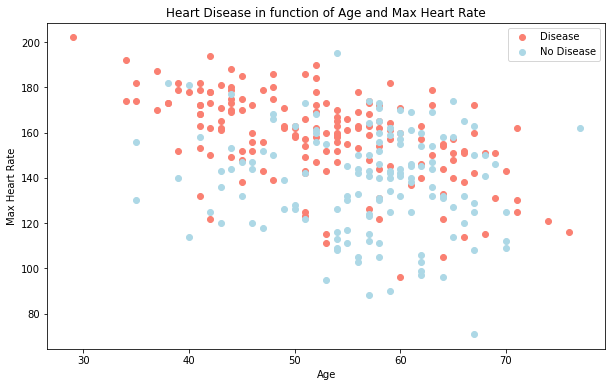

In [21]:
# Create another figure
plt.figure(figsize= (10, 6))

# Scatter with postive examples
plt.scatter(df.age[df.target ==1],
            df.thalach[df.target == 1],
           c = 'salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'lightblue')

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

# Comparing Age and trestbps for Heart Disease

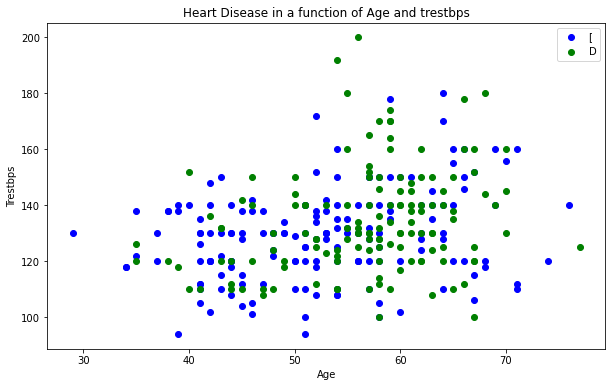

In [22]:
# Creating figure
plt.figure(figsize = (10, 6))

# scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.trestbps[df.target == 1],
            c = 'blue')

# scatter with negative example
plt.scatter(df.age[df.target == 0],
            df.trestbps[df.target == 0],
            c = 'green')

# Adding some useful info
plt.title('Heart Disease in a function of Age and trestbps')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.legend('[Disease, No Disease]');

In [23]:
df.age[df.target ==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

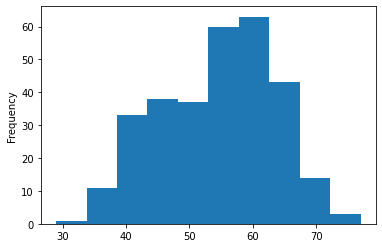

In [24]:
# Chech the distribution of the age column with a histogram
df.age.plot.hist(); # Normal distribution look like a bell curve

### Heart Disease Frequency per Chest Pain Type
3. cp-chest pain type
 * 0:Typical angina: chest pain related decrease blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease

In [25]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


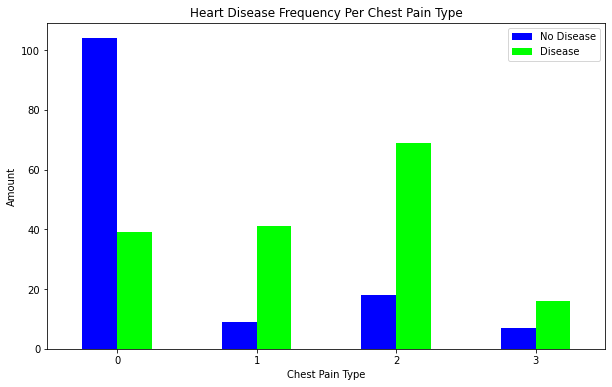

In [26]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (10,6),
                                   color = ['blue', 'lime'])

# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0);

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# Correlation metrics is a big table of number telling how each independent variable is related to another
# whether the correlation is a positive one or a negative one
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


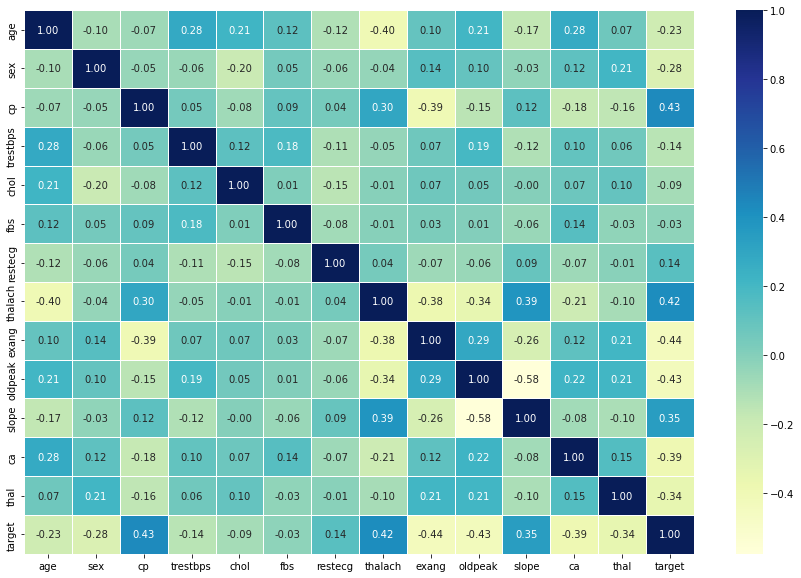

In [29]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                linewidths = 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu');

# for adjusting the axis
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

In [30]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


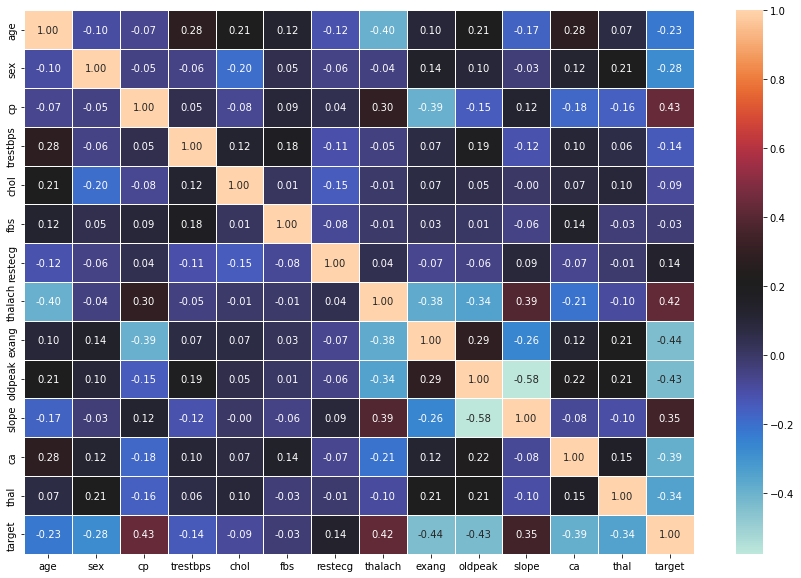

In [31]:
cor_mat = df.corr()
fig, ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(cor_mat,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '0.2f',
                 cmap = 'icefire')

## 5. Modelling

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
# Split data into X and y
X = df.drop('target', axis = 1)
y = df.target.values

In [34]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [38]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

Note: Machine learning and data science is about asking the right question

In [39]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a funciton to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to mode_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [40]:
# Putting the models in a dictionary
model_dict = {'LogReg': LogisticRegression(),
              'KNn': KNeighborsClassifier(),
              'Rand': RandomForestClassifier(),}

# Create a funciton to fit and score
def fit_score(model_dict, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning model
    model_dict : a dictionary of different Sckit_learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels"""
    
    # Setup random seed
    np.random.seed(42)
    
    # Make a dictionary to keep models scores
    model_keep = {}
    # Loop through models
    for name, model in model_dict.items():
        # Fit the model to data
        model.fit(X_train, y_train)
        # Evaluate the model and append the score to model_keep
        model_keep[name] = model.score(X_test, y_test)
    return model_keep

In [41]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\chukw\MachineLearning\first_project\DataScience\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [42]:
model_keep = fit_score(model_dict = model_dict,
                       X_train = X_train,
                       X_test = X_test,
                       y_train = y_train,
                       y_test = y_test,)
model_keep

C:\Users\chukw\MachineLearning\first_project\DataScience\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogReg': 0.8852459016393442,
 'KNn': 0.6885245901639344,
 'Rand': 0.8360655737704918}

# Model Comparison

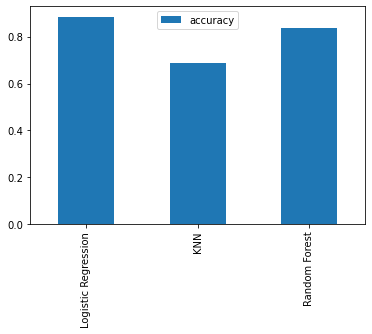

In [43]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

<AxesSubplot:>

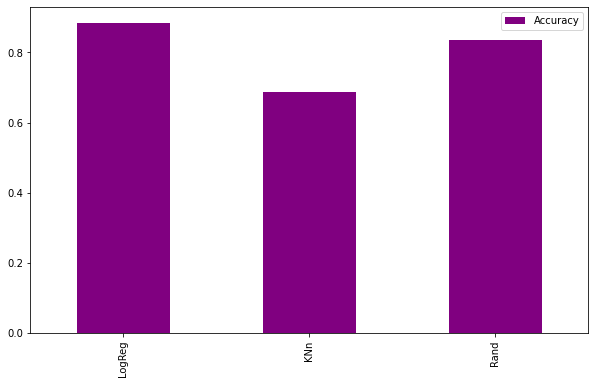

In [44]:
compare_the_model = pd.DataFrame(model_keep, index = ['Accuracy'])
compare_the_model.T.plot(kind = 'bar', figsize = (10, 6), color = ['purple' ])

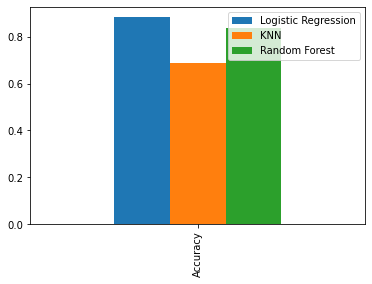

In [45]:
compare_model = pd.DataFrame(model_scores, index = ['Accuracy'])
compare_model.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off.
What should we do?

Things to pay attention to while working with classification mode:
* Hyperparameter tuning
* Feature importance
* Confusion_matrix
* Cross-validation
* Precison
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

# Comparing Classification and Regression metrics
### Classification
* Accuracy
* Precision
* Recall
* F1

### Regression
* R^2 (r-squared)
* Mean absolute error (MAE)
* Mean squared error (MSE)
* Root mean squared error (RMSE)

In [46]:
# Hyperparameter tuning
# Let's tune KNN
train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instances
knn = KNeighborsClassifier()
# Loop through diffedrent n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list 
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_score.append(knn.score(X_test, y_test))

In [47]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [48]:
# Practice
# Hyperparameter tunning
# Tuning the KNN

testScore = []
trainScore = []

# Create the list of different values for n_neighbors
neigh = range(1 , 21)

# Instantiantiate the KNN
KnN = KNeighborsClassifier()

# Loop through the various n_neighbors
for i in neigh:
    KnN.set_params(n_neighbors = i)
    
    # Fit the model to the training data
    KnN.fit(X_train, y_train)
    
    # Update the trainScore list
    trainScore.append(KnN.score(X_train, y_train))
    
    # Update the testScore list
    testScore.append(KnN.score(X_test, y_test))

In [49]:
trainScore

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [50]:
testScore

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [51]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


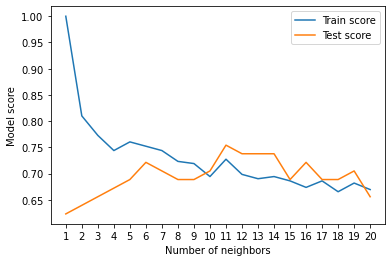

In [52]:
plt.plot(neighbors, train_score, label = 'Train score')
plt.plot(neighbors, test_score, label = 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_score) * 100:.2f}%');


Maximum test score on the data is: 75.41%


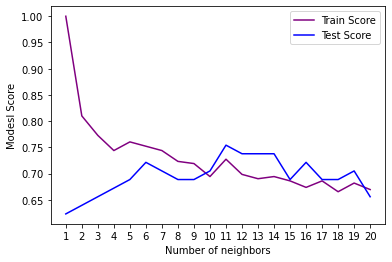

In [53]:
plt.plot(neigh, trainScore, label = 'Train Score', color = 'purple')
plt.plot(neigh, testScore, label =  'Test Score', color = 'blue')
plt.xticks(np.arange(1, 21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Modesl Score')
plt.legend()

print(f'Maximum test score on the data is: {max(testScore) * 100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [54]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5,10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [55]:
# Create a hyperparameter grid for LogisticRegression
# Practice
LogRegGrid = {'C': np.logspace(-4, 4, 20),
              'solver': ['liblinear']}
# Create a hyperparameter grid RandomForestClassifier
RandFGrid = {'n_estimators': np.arange(10, 1000, 50),
             'max_depth': [None, 3, 5, 10],
             'min_samples_split': np.arange(2, 20,2),
             'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [56]:
# Tune LogisticRegression

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [57]:
# Practice 
# Tuning LogisticRegression

np.random.seed(42)

# Setup random hpyerparameter search for LogisticRegresssion
rsearch = RandomizedSearchCV(LogisticRegression(),
                            param_distributions = LogRegGrid,
                             cv = 5,
                             n_iter = 20,
                             verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [59]:
# Practice
rsearch.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [60]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [61]:
# Practice
rsearch.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [62]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [63]:
# Practice
# Tuning randomforestclassifier
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rsearchf = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = RandFGrid,
                              cv = 5,
                              n_iter =20,
                              verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rsearchf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [64]:
rsearchf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [65]:
rsearchf.score(X_test, y_test)

0.8688524590163934

In [66]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [67]:
# Evaluate the Randomized Search RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

In [68]:
model_keep

{'LogReg': 0.8852459016393442,
 'KNn': 0.6885245901639344,
 'Rand': 0.8360655737704918}

# Methods of tuning hyperparameters
1. By hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using the GridSearchCV...

In [69]:
# Different hyperparameters for our LogisticRegression model
LogGrid = {'C': np.logspace(-4, 4, 30),
           'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gridLog = GridSearchCV(LogisticRegression(),
                       param_grid = LogGrid,
                       cv = 5,
                       verbose = True)
# Fit grid hyperparameter search model
gridLog.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [70]:
gridLog.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
# Evaluate the grid search LogisticRegression model
gridLog.score(X_test, y_test)

0.8852459016393442

In [72]:
model_keep

{'LogReg': 0.8852459016393442,
 'KNn': 0.6885245901639344,
 'Rand': 0.8360655737704918}

In [73]:
# # Different Hyperparameter for our RandomForestClassifier
# regGrid = {'n_estimators': np.arange(10, 1000, 50),
#              'max_depth': [None, 3, 5, 10],
#              'min_samples_split': np.arange(2, 20,2),
#              'min_samples_leaf': np.arange(1, 20, 2)}

# # Setup grid hyperparameter for RandomForestClassifier
# gridReg = GridSearchCV(RandomForestClassifier(),
#                        param_grid = regGrid,
#                        cv = 5,
#                        verbose = True)
# # Fit grid Hyperparameter  search model
# gridReg.fit(X_train, y_train)

In [74]:
# gridReg.best_params_

## Evaluating our tuned machine learning classifier, beyound accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
...and it would be great if cross-validation was used where possible.
To make comparisons and evaluate our trained model, first we need to make predictions.

In [75]:
# Make prediction with tunned models
y_pred = gridLog.predict(X_test)

In [76]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\chukw\MachineLearning\first_project\DataScience\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


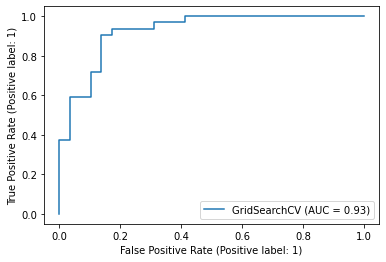

In [78]:
# The ROC curve is a way of understanding how your model is performing by comparing the true positive to the false positive
#Import ROC curve funcion from the sklearn.metrics model
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate and calculate the AUC metrics
plot_roc_curve(gridLog, X_test, y_test)

In [79]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))

[[25  4]
 [ 3 29]]


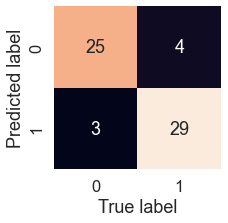

In [80]:
# Improve the visualization of the confusion_matrix
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_pred):
    '''Plot a nice looking confusion matrix using Seaborn's heatmap()'''
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), 
                     annot = True,
                     cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cros

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Precision indicate the proportion of positive identification which were actually correct while recall indicate the proportion of actual positive which were correctly classified

## Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using the cross-validation and to do so we'll be using cross_val_score().

In [82]:
# check best hyperparameters
gridLog.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [83]:
# Create a new classifier with bes parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

In [84]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [85]:
np.mean(cv_acc)

0.8479781420765027

In [86]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X, 
                               y,
                               cv = 5,
                               scoring = 'precision')
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [87]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [88]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [89]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

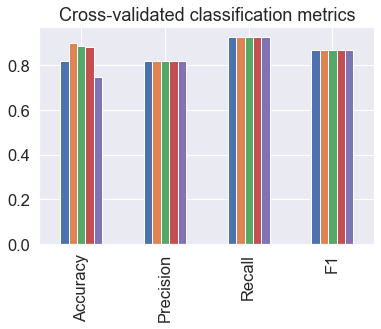

In [90]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                           'Precision' : cv_precision,
                           'Recall' : cv_recall,
                           'F1' : cv_f1})
index = [0]
                        

cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics',
                      legend = False);

### Feature Importance

Feature importance is another way of asking, which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model
Check out to find feature importance using LogisticRegression. One way to find feature importance is to search for '(MODEL NAME) feature importance'.

Let's find the feature importance for our 

In [91]:
# Fit an insance of LogisticRegression
gridLog.best_params_

clf = LogisticRegression(C = 0.20433597178569418, 
                          solver = 'liblinear')

clf.fit(X_train, y_train);

In [92]:
# Check coef_
clf.coef_ # this gives us the coefficient the value of how each parameter the independent values contribute to the labels

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [93]:
# Math coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

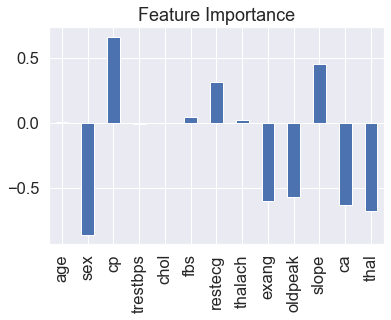

In [94]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

In [95]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [96]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slop -the slope of the peak exercise ST Segment

* 0: Upsloping: better heart rate with exercise(uncommon)
* 1: Flatsloping: minimal change (typical health heart)
* 2: Downslopins: signs of unhealthy heart

In [ ]:
## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit you evaluation metric) how would you export it an share it with others?